In [663]:

import matplotlib.pyplot as plt 
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [664]:
sd = pd.read_csv('stroke_data.csv')
sd.head(10)

,gender,age,ever_married,work_type,residence_types,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,77,No,Private,Urban,Yes,Yes,121,24,never,0
1,Female,53,Yes,Private,Urban,No,No,107,49,smokes,0
2,Male,52,No,Self_employed,Urban,Yes,Yes,291,31,never,1
3,Female,62,No,Self_employed,Urban,No,Yes,191,48,smokes,1
4,Male,56,No,Private,Rural,Yes,Yes,179,41,formerly,1
5,Female,83,No,Self_employed,Rural,Yes,Yes,163,21,smokes,1
6,Female,74,Yes,Self_employed,Urban,Yes,Yes,129,38,formerly,1
7,Female,52,Yes,Self_employed,Rural,Yes,Yes,181,40,smokes,1
8,Female,51,Yes,Private,Rural,Yes,Yes,298,33,smokes,1
9,Female,53,No,Self_employed,Urban,No,Yes,197,57,smokes,1


## Preprocesado

In [665]:
sd.shape

(3678, 11)

In [666]:
sd.describe()

,age,avg_glucose_level,bmi,stroke
count,3678.000000,3678.000000,3678.000000,3678.000000
mean,69.511691,200.953235,39.953235,0.852637
std,11.628332,57.950989,11.561214,0.354515
min,50.000000,100.000000,20.000000,0.000000
25%,59.000000,150.000000,30.000000,1.000000
50%,70.000000,202.000000,40.000000,1.000000
75%,80.000000,251.000000,50.000000,1.000000
max,89.000000,299.000000,59.000000,1.000000


In [667]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             3678 non-null   object
 1   age                3678 non-null   int64 
 2   ever_married       3678 non-null   object
 3   work_type          3678 non-null   object
 4   residence_types    3678 non-null   object
 5   hypertension       3678 non-null   object
 6   heart_disease      3678 non-null   object
 7   avg_glucose_level  3678 non-null   int64 
 8   bmi                3678 non-null   int64 
 9   smoking_status     3678 non-null   object
 10  stroke             3678 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 316.2+ KB


In [668]:
sd.isnull().sum()

gender               0
age                  0
ever_married         0
work_type            0
residence_types      0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [669]:
sd.groupby(['gender','hypertension']).size()

gender  hypertension
Female  No               799
        Yes             1769
Male    No               351
        Yes              759
dtype: int64

gender
Female    2568
Male      1110
Name: count, dtype: int64


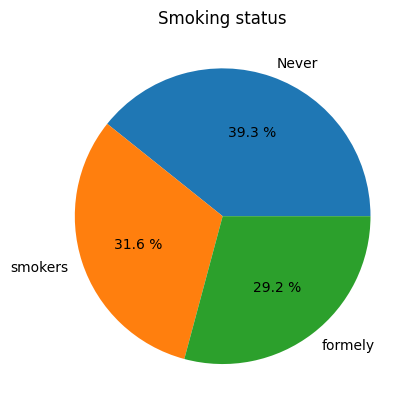

In [670]:
plt.pie(sd.smoking_status.value_counts(),labels=['Never', 'smokers','formely'], autopct="%0.1f %%")
plt.title('Smoking status')
print(sd['gender'].value_counts())

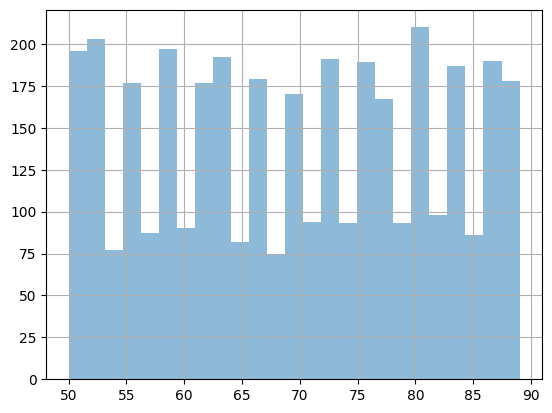

In [671]:
grafico_age=sd['age'].hist(alpha=0.5,bins=25)

#### Reemplazando valores

In [672]:
pd.set_option('future.no_silent_downcasting', True)

#sd['ever_married'] = sd['ever_married'].replace({'Yes': 0, 'No': 1})
sd['gender'] = sd['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
#sd['Residence_type'] = sd['Residence_type'].replace({'Urban': 0, 'Rural': 1})
sd['smoking_status'] = sd['smoking_status'].replace({'formerly': 1, 'never': 0, 'smokes': 2, 'Unknown': 3})
#sd['work_type'] = sd['work_type'].replace({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})
sd['hypertension'] = sd['hypertension'].replace({'No': 0, 'Yes': 1})
sd['heart_disease'] = sd['heart_disease'].replace({'No': 0, 'Yes': 1})



In [673]:
eliminar = ['ever_married','work_type','residence_types',]
sd = sd.drop(eliminar, axis =1)

In [674]:
sd.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,77,1,1,121,24,0,0
1,1,53,0,0,107,49,2,0
2,0,52,1,1,291,31,0,1
3,1,62,0,1,191,48,2,1
4,0,56,1,1,179,41,1,1


## Análisis exploratorio de datos

Buscando la correlación entre las variables

,stroke
stroke,1.000000
hypertension,0.336761
heart_disease,0.323144
smoking_status,0.280881
bmi,0.262341
avg_glucose_level,0.218125
gender,-0.002628
age,-0.009148


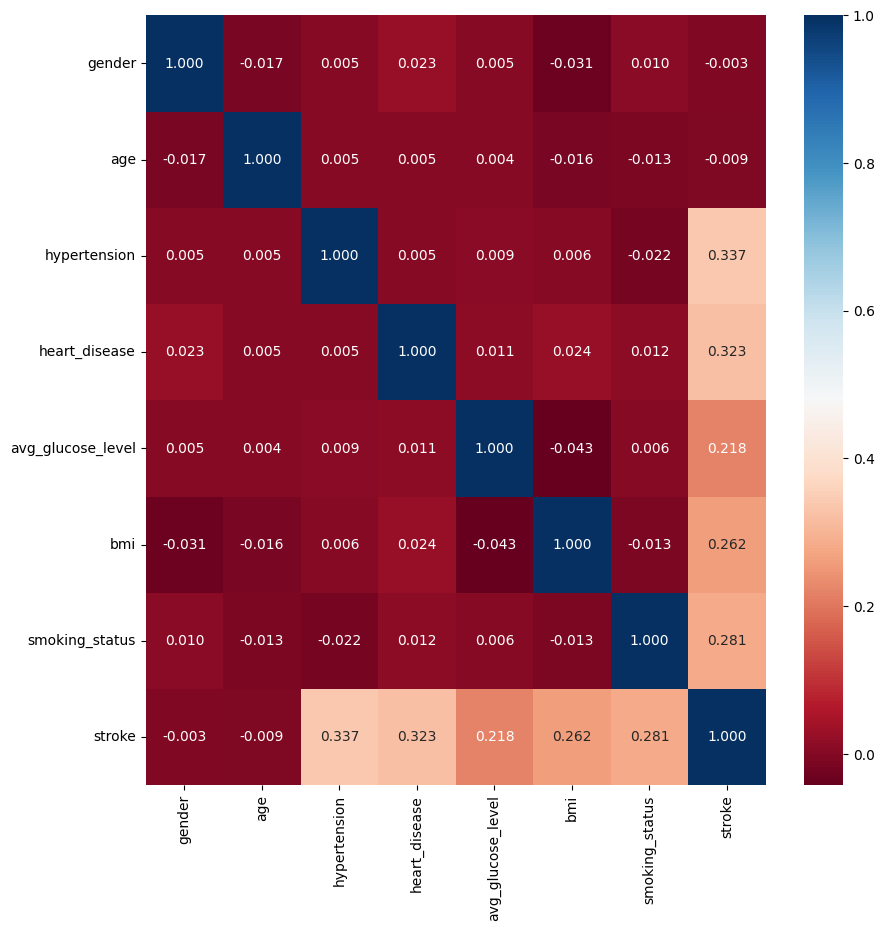

In [675]:
corr = sd.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
corr[['stroke']].sort_values(by = 'stroke',ascending = False)


In [676]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [677]:
# Normalización 
sd.avg_glucose_level=(sd.avg_glucose_level-min(sd.avg_glucose_level))/(max(sd.avg_glucose_level)-min(sd.avg_glucose_level))
sd.age=(sd.age-min(sd.age))/(max(sd.age)-min(sd.age))
sd.bmi=(sd.bmi-min(sd.bmi))/(max(sd.bmi)-min(sd.bmi))
sd.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.692308,1,1,0.105528,0.102564,0,0
1,1,0.076923,0,0,0.035176,0.743590,2,0
2,0,0.051282,1,1,0.959799,0.282051,0,1
3,1,0.307692,0,1,0.457286,0.717949,2,1
4,0,0.153846,1,1,0.396985,0.538462,1,1


## Vizualización de datos

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

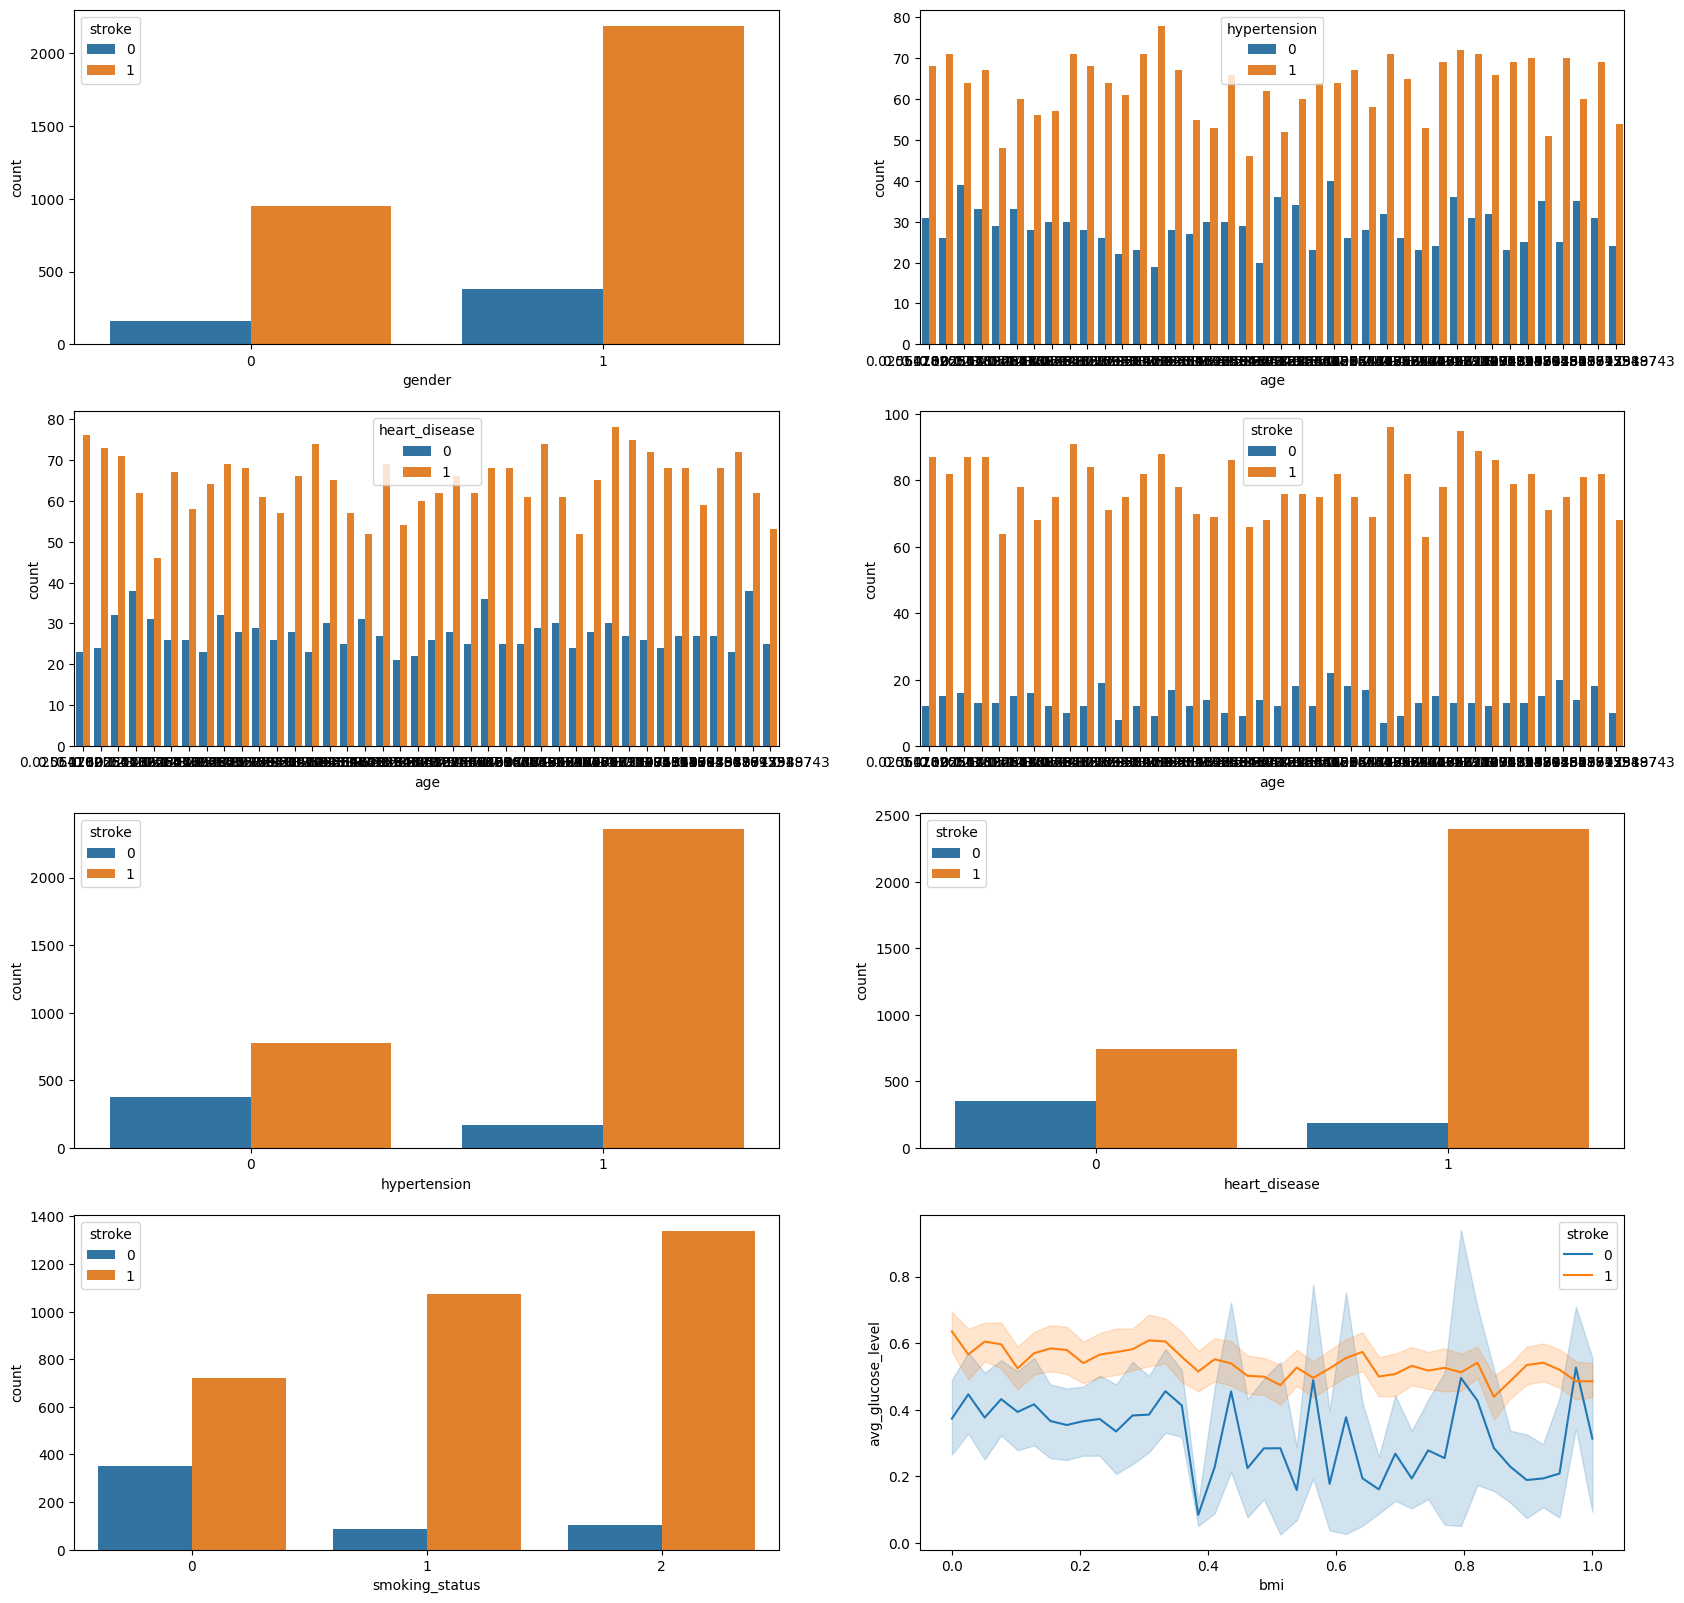

In [678]:
fig, ax = plt.subplots(4,2,figsize=(20, 20))
sns.countplot(x = 'gender', data = sd,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = sd,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = sd,hue = 'heart_disease', ax=ax[1,0])
sns.countplot(x = 'age', data = sd,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'hypertension', data = sd,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'heart_disease', data = sd,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = sd,hue = 'stroke', ax=ax[3,0])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = sd,hue = 'stroke', ax=ax[3,1])



## Entrenamiento

In [679]:
sd.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.692308,1,1,0.105528,0.102564,0,0
1,1,0.076923,0,0,0.035176,0.743590,2,0
2,0,0.051282,1,1,0.959799,0.282051,0,1
3,1,0.307692,0,1,0.457286,0.717949,2,1
4,0,0.153846,1,1,0.396985,0.538462,1,1


In [680]:
variables = sd[['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
X = np.asarray(variables)
X[0:5]

array([[0, 0.6923076923076923, 1, 1, 0.10552763819095477,
        0.10256410256410256, 0],
       [1, 0.07692307692307693, 0, 0, 0.035175879396984924,
        0.7435897435897436, 2],
       [0, 0.05128205128205128, 1, 1, 0.9597989949748744,
        0.28205128205128205, 0],
       [1, 0.3076923076923077, 0, 1, 0.457286432160804,
        0.717948717948718, 2],
       [0, 0.15384615384615385, 1, 1, 0.3969849246231156,
        0.5384615384615384, 1]], dtype=object)

In [681]:
y = np.asarray(sd['stroke'])
y [0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [682]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2942, 7) (2942,)
Test set: (736, 7) (736,)


In [683]:
y_train[0:20]

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## Entrenamiento de modelos

### Logistic Regression

In [684]:
lr = LogisticRegression(max_iter=200)
lr

LogisticRegression(max_iter=200)

In [685]:
#training the model
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9334239130434783

In [686]:
#testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)
lr_pred[0:50]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [687]:
yhat = lr.predict(X_test)
yhat [0:100]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

### Support Vector Machine (SVM)

In [688]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train) 

SVC()

In [689]:
#training the model
svm.score(X_test, y_test)

0.9619565217391305

In [690]:
#testing the model
sv_pred = svm.predict(X_test)
accuracy_score(y_test, sv_pred)

0.9619565217391305

### Decision Tree Classifier

In [691]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [692]:
#training the model
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9510869565217391

In [693]:
#testing the model
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9510869565217391

In [694]:
print (dt_pred [0:5])
print (y_test [0:5])

[1 1 1 0 1]
[1 1 1 0 1]


In [695]:
from sklearn.model_selection import GridSearchCV, cross_val_score


minSplit = np.arange(20, 26, 1)
maxDepth = np.arange(3, 10, 1)

parametros = [
    {'criterion': ['gini'], 'max_depth': maxDepth, 'min_samples_split': minSplit},
    {'criterion': ['entropy'], 'max_depth': maxDepth, 'min_samples_split': minSplit}
]

# Crear el modelo de árbol de decisiones
dt = DecisionTreeClassifier()

# Realizar la búsqueda en cuadrícula
gridSearch = GridSearchCV(estimator=dt, param_grid=parametros, scoring='accuracy', cv=10)
gridSearch.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
mejor_arbol = gridSearch.best_estimator_
mejores = gridSearch.best_params_
print("Mejores parámetros:", mejores, "\n")

# Hacer predicciones en el conjunto de prueba
y_pred_test = mejor_arbol.predict(X_test)

# Calcular la precisión usando accuracy_score
score_arbol_gs = accuracy_score(y_test, dt_pred)
print('Precisión del algoritmo Árbol de decisiones después de GridSearchCV: ', score_arbol_gs, "\n")

# Validación cruzada
k_gs = cross_val_score(estimator=mejor_arbol, X=X_train, y=y_train, cv=10)
cvm_arbol_gs = k_gs.mean()
std_arbol_gs = k_gs.std()
print("Promedio Validación cruzada Árbol de decisiones después de GridSearchCV: ", cvm_arbol_gs, "\n")
print('Varianza del Árbol de decisiones después de GridSearchCV: ', std_arbol_gs)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 20} 

Precisión del algoritmo Árbol de decisiones después de GridSearchCV:  0.9510869565217391 

Promedio Validación cruzada Árbol de decisiones después de GridSearchCV:  0.9989795918367346 

Varianza del Árbol de decisiones después de GridSearchCV:  0.001558699215971376


### K-Nearest Neighbors (KNN)

In [696]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [697]:
#training the model
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9646739130434783

In [698]:
#testing the model
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9646739130434783

## Model Evaluation

### Logistic Regression and Confusion Matrix

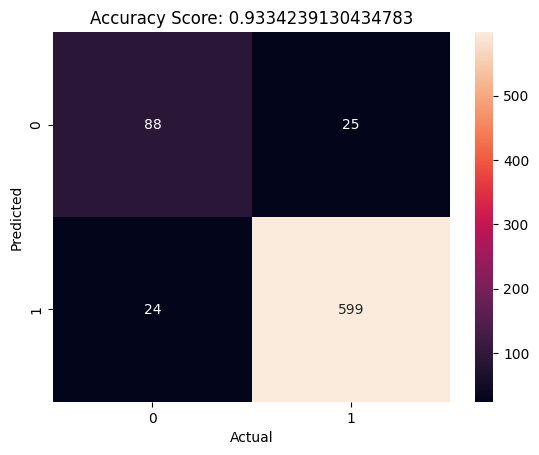

In [699]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [700]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9334239130434783
Logistic Regression Model F1 score:  0.9607056936647955
Logistic Regression Model Mean Absolute Error:  0.06657608695652174
Logistic Regression Model Mean Squared Error:  0.06657608695652174
Logistic Regression Model log loss:  2.399645402264593


### Support Vector Machine and Confusion Matrix 

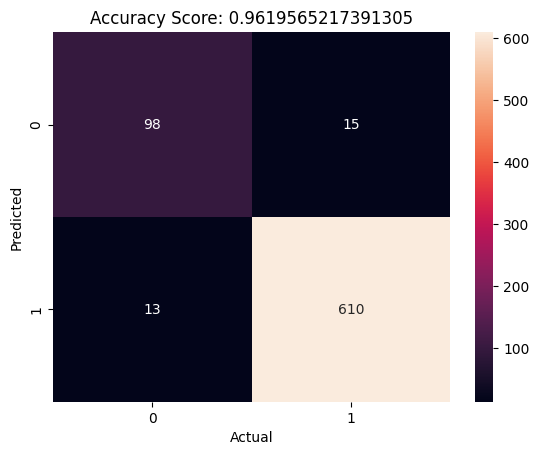

In [701]:
sns.heatmap(metrics.confusion_matrix(y_test, sv_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [702]:
print('SVM Model Accuracy Score:',accuracy_score(y_test, sv_pred))
print('SVM Model F1 score: ',metrics.f1_score(y_test, sv_pred))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, sv_pred))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(y_test, sv_pred))
print('SVM Model log loss: ',log_loss(y_test, sv_pred))

SVM Model Accuracy Score: 0.9619565217391305
SVM Model F1 score:  0.9775641025641025
SVM Model Mean Absolute Error:  0.03804347826086957
SVM Model Mean Squared Error:  0.03804347826086957
SVM Model log loss:  1.371225944151196


### Decision Tree Classifier and Confusion Matrix

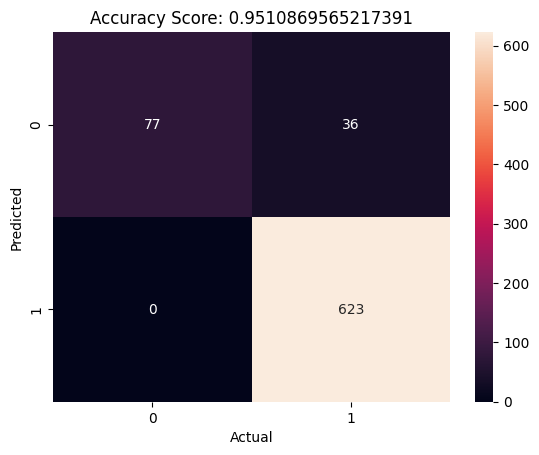

In [703]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [704]:
print('Decision Tree Model Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Model F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Model Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Model Accuracy Score: 0.9510869565217391
Decision Tree Model F1 score:  0.9719188767550702
Decision Tree Model Mean Absolute Error:  0.04891304347826087
Decision Tree Model Mean Squared Error:  0.04891304347826087
Decision Tree Model log loss:  1.763004785337252


### K-Nearest Neighbors and Confusion Matrix

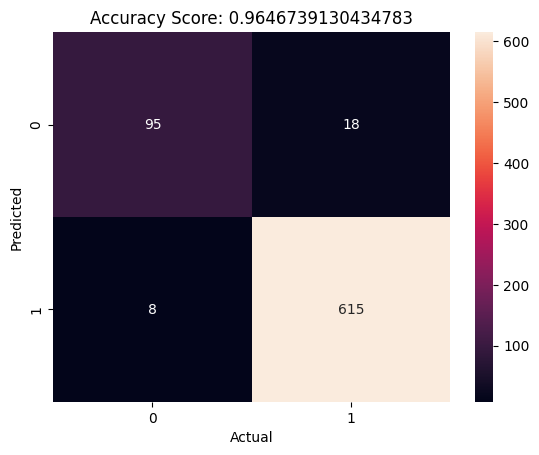

In [705]:
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [706]:
print('KNN Model Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN Model F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Model Accuracy Score: 0.9646739130434783
KNN Model F1 score:  0.9792993630573248
KNN Model Mean Absolute Error:  0.035326086956521736
KNN Model Mean Squared Error:  0.035326086956521736
KNN Model log loss:  1.2732812338546822


## Model Comparison

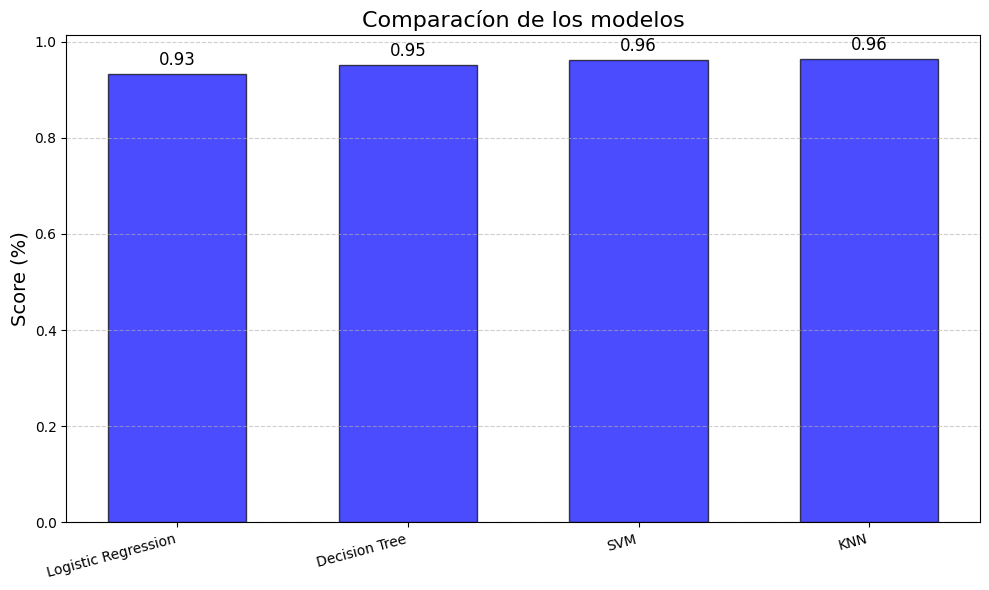

In [707]:
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN'] 
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred), 
            accuracy_score(y_test, sv_pred), accuracy_score(y_test, knn_pred)]  


plt.figure(figsize=(10, 6))  
bars = plt.bar(models, accuracy, color='blue', width=0.6, alpha=0.7, edgecolor='k')  
for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=12)
plt.ylabel('Score (%)', fontsize=14)  
plt.title('Comparacíon de los modelos', fontsize=16)  
plt.grid(axis='y', linestyle='--', alpha=0.6)  
plt.xticks(rotation=15, ha='right')  
plt.tight_layout()  
plt.show()


Probando el modelo con datos aleatorios

In [709]:
new = np.array([[0, 0.6923076923076923, 1, 1, 0.10552763819095477,0.10256410256410256, 0],
       [1, 0.07692307692307693, 0, 0, 0.035175879396984924,         0.7435897435897436, 2],
       [0, 0.05128205128205128, 1, 1, 0.9597989949748744,        0.28205128205128205, 0],
       [1, 0.3076923076923077, 0, 1, 0.457286432160804,        0.717948717948718, 2],
       [0, 0.15384615384615385, 1, 1, 0.3969849246231156,       0.5384615384615384, 1]])
result = svm.predict(new)
print(result)

[0 0 1 1 1]


In [651]:
filename = 'modelo_stroke_svm.sav'
pickle.dump(dt, open (filename, 'wb'))

In [492]:
load = pickle.load(open('modelo_stroke_svm.sav', 'rb'))

## Concluciones

El análisis de las gráficas revela que la edad, la hipertensión y la enfermedad cardíaca son factores de riesgo para sufrir un accidente cerebrovascular. Sin embargo, se observa una peculiaridad: las personas con menor probabilidad de hipertensión y enfermedad cardíaca tienen mayores posibilidades de sufrir un evento cerebrovascular. Además, los no fumadores tienen mayores probabilidades de sufrir un ataque cerebral que los fumadores. Por otro lado, las personas con un BMI entre 20 y 50 tienen mayores probabilidades de sufrir un derrame cerebral. Finalmente, otras características como el estado civil, el tipo de residencia y el tipo de trabajo también parecen tener un efecto sobre las posibilidades de sufrir un accidente cerebrovascular. 
